In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
descript_tfidf = pd.read_csv("processed_text/descriptions_tfidf.csv")
books_withRatings = pd.read_csv("cleaned_data/books_withRatings.csv")

In [13]:
normalize = StandardScaler()
descript_normalized = normalize.fit_transform(descript_tfidf)
descript_normalized = pd.DataFrame(descript_normalized, columns= descript_tfidf.columns)
descript_normalized.head(10)

,20th,20th century,abandoned,abbey,ability,able,absolutely,absorbing,academy,accept,...,york time,york timesbestselling,yorker,young,young adult,young girl,young reader,younger,youngest,youth
0,-0.078401,-0.074269,-0.10757,-0.057726,-0.125898,-0.116937,-0.073417,-0.071999,-0.069945,-0.080303,...,-0.361839,-0.076506,-0.088809,-0.377034,-0.077071,-0.094017,-0.071999,-0.094858,-0.073087,-0.10327
1,-0.078401,-0.074269,-0.10757,-0.057726,6.371067,-0.116937,-0.073417,-0.071999,-0.069945,-0.080303,...,-0.361839,-0.076506,-0.088809,-0.377034,-0.077071,-0.094017,-0.071999,-0.094858,-0.073087,-0.10327
2,-0.078401,-0.074269,-0.10757,-0.057726,-0.125898,7.597283,-0.073417,-0.071999,-0.069945,-0.080303,...,-0.361839,-0.076506,-0.088809,-0.377034,-0.077071,-0.094017,-0.071999,-0.094858,-0.073087,-0.10327
3,-0.078401,-0.074269,-0.10757,-0.057726,-0.125898,-0.116937,-0.073417,-0.071999,-0.069945,-0.080303,...,-0.361839,-0.076506,-0.088809,-0.377034,-0.077071,-0.094017,-0.071999,-0.094858,-0.073087,-0.10327
4,-0.078401,-0.074269,-0.10757,-0.057726,-0.125898,-0.116937,-0.073417,-0.071999,-0.069945,-0.080303,...,-0.361839,-0.076506,-0.088809,-0.377034,-0.077071,-0.094017,-0.071999,-0.094858,-0.073087,-0.10327
5,-0.078401,-0.074269,-0.10757,-0.057726,-0.125898,-0.116937,-0.073417,-0.071999,-0.069945,-0.080303,...,-0.361839,-0.076506,-0.088809,4.021584,-0.077071,-0.094017,13.889172,-0.094858,-0.073087,-0.10327
6,-0.078401,-0.074269,-0.10757,-0.057726,-0.125898,-0.116937,-0.073417,-0.071999,-0.069945,-0.080303,...,-0.361839,-0.076506,-0.088809,-0.377034,-0.077071,-0.094017,-0.071999,-0.094858,-0.073087,-0.10327
7,-0.078401,-0.074269,-0.10757,-0.057726,-0.125898,-0.116937,-0.073417,-0.071999,-0.069945,-0.080303,...,-0.361839,-0.076506,-0.088809,-0.377034,-0.077071,-0.094017,-0.071999,-0.094858,-0.073087,-0.10327
8,-0.078401,-0.074269,-0.10757,-0.057726,-0.125898,-0.116937,-0.073417,-0.071999,-0.069945,-0.080303,...,-0.361839,-0.076506,-0.088809,-0.377034,-0.077071,-0.094017,-0.071999,-0.094858,-0.073087,-0.10327
9,-0.078401,-0.074269,-0.10757,-0.057726,-0.125898,-0.116937,-0.073417,-0.071999,-0.069945,-0.080303,...,-0.361839,-0.076506,-0.088809,-0.377034,-0.077071,-0.094017,-0.071999,-0.094858,-0.073087,-0.10327


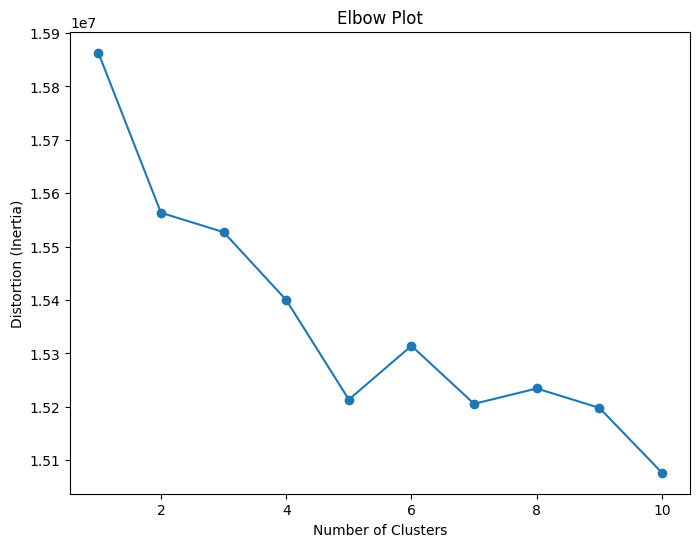

In [22]:
distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(descript_normalized)
    distortions.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.show()

In [29]:
from gensim import matutils
from gensim.models import TfidfModel, LdaModel
from gensim.corpora import Dictionary
from gensim import corpora

array([[-0.07840148, -0.07840148, -0.07840148, ..., -0.07840148,
        -0.07840148, -0.07840148],
       [-0.07426904, -0.07426904, -0.07426904, ..., -0.07426904,
        -0.07426904, -0.07426904],
       [-0.10756981, -0.10756981, -0.10756981, ..., -0.10756981,
        -0.10756981, -0.10756981],
       ...,
       [-0.09485849, -0.09485849, -0.09485849, ..., -0.09485849,
        -0.09485849, -0.09485849],
       [-0.07308702, -0.07308702, -0.07308702, ..., -0.07308702,
        -0.07308702, -0.07308702],
       [-0.10327008, -0.10327008, -0.10327008, ..., -0.10327008,
        -0.10327008, -0.10327008]])

In [31]:
feature_names = descript_normalized.columns

corpus = matutils.Dense2Corpus(descript_normalized.T.values)

# Create a dictionary mapping terms to their integer ids
id2word = corpora.Dictionary.from_corpus(corpus, id2word=dict((id, term) for id, term in enumerate(descript_normalized.columns)))

# Build an LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=10)

# Print the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

/Users/joshuachen/anaconda3/envs/uni/lib/python3.11/site-packages/gensim/models/ldamodel.py:721: RuntimeWarning: overflow encountered in exp
  expElogthetad = np.exp(Elogthetad)
/Users/joshuachen/anaconda3/envs/uni/lib/python3.11/site-packages/gensim/models/ldamodel.py:719: RuntimeWarning: invalid value encountered in multiply
  gammad = self.alpha + expElogthetad * np.dot(cts / phinorm, expElogbetad.T)
/Users/joshuachen/anaconda3/envs/uni/lib/python3.11/site-packages/numpy/core/numeric.py:925: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
